In [1]:
%pip install -q tf-nightly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import sys
import argparse
import json
import itertools
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PIL import Image
import IPython.display as display
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import MultiLabelBinarizer
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.backend as K
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras.models import Sequential

In [3]:
# csv files and data folders
# labela and data in "./data/raw_data_in/"
# image_folder_1.csv
# image_folder_2.csv, data in "./data/raw_data_in/"
# image_folder_4.csv, data in "./data/crop_folder4/"

In [4]:
# rgb edited image 
DATA_DIR_IN = "./Data/raw_data_in/"
DATA_DIR_IN_2 = "./Data/crop_folder2/"
DATA_DIR_IN_4 = "./Data/crop_folder4/"

In [5]:
def read_data(data_dir):
    
    fpaths = []
    labels = []
    data_map = {} # {'filename':[path,label]}

    for fname in os.listdir(data_dir):
        if '.DS_Store' in fname:
            continue
        path_label = ['','']
        fpath = os.path.join(data_dir, fname)
        image_label, ftype = fname.split(".")
                
        if not image_label in data_map:
            data_map[image_label] = path_label
        #print("name: {}\tlabel: {}".format(image_label, ftype))
        
        if ftype == 'txt':
            f = open(fpath, "r")
            label = f.readlines()
            # label is list with len 1
            f.close()
            labels.append(label[0])
            data_map[image_label][0] = label[0]
        else:
            fpaths.append(fpath)
            data_map[image_label][1] = fpath
            

        #print("fpath: {}, label: {}".format(fpath, label))
    
    for key in data_map:
        print("key: {}, label path: {}".format(key, data_map[key])) 
        
    labels = np.array(labels)
    fpaths = np.array(fpaths)
     
    print("shape of fpaths: {}\tshape of labels: {}".format(fpaths.shape, 
        labels.shape))
    return data_map #fpaths, labels

In [6]:
data_map = read_data(DATA_DIR_IN)

key: (6894), label path: ['05590', './Data/raw_data_in/(6894).jpg']
key: (6895), label path: ['04011', './Data/raw_data_in/(6895).jpg']
key: (6897), label path: ['03879', './Data/raw_data_in/(6897).jpg']
key: (6898), label path: ['18645', './Data/raw_data_in/(6898).jpg']
key: (6901), label path: ['01309', './Data/raw_data_in/(6901).jpg']
key: (6902), label path: ['03562', './Data/raw_data_in/(6902).jpg']
key: (6905), label path: ['09488', './Data/raw_data_in/(6905).jpg']
key: (6907), label path: ['10027', './Data/raw_data_in/(6907).jpg']
key: (6909), label path: ['06144', './Data/raw_data_in/(6909).jpg']
key: (6910), label path: ['53058', './Data/raw_data_in/(6910).jpg']
key: (6911), label path: ['00117', './Data/raw_data_in/(6911).jpg']
key: (6912), label path: ['21082', './Data/raw_data_in/(6912).jpg']
key: (6913), label path: ['02649', './Data/raw_data_in/(6913).jpg']
key: (6914), label path: ['00826', './Data/raw_data_in/(6914).jpg']
key: (6915), label path: ['00489', './Data/raw_d

In [7]:
len(data_map)

999

In [8]:
import pandas as pd
image_label = pd.read_csv('image_folder_1.csv',header=None,sep = ";", dtype=str)
image_label2 = pd.read_csv('image_folder_2.csv',header=None,sep = ";", dtype=str)
image_label4 = pd.read_csv('image_folder_4.csv',header=None,sep = ";", dtype=str)
print(image_label4.shape)
image_label4 = image_label4.dropna()
image_label4.shape

(1456, 2)


(1238, 2)

In [9]:
image_label_dict1 = dict(image_label.values.tolist())
image_label_dict2 = dict(image_label2.values.tolist())
image_label_dict4 = dict(image_label4.values.tolist())

In [10]:
# Three2_00000.jpg	01844
# key: (7151), label path: ['04978', './data/raw_data_in/(7151).jpg']
total_dict = {}
for key in image_label_dict_total:
        print("key: {}, label path: {}".format(key, image_label_dict_total[key])) 
        break       

NameError: name 'image_label_dict_total' is not defined

In [11]:
def read_data_others(data_dir, input_map):
    output_map = {}
    for key in input_map:
        #print("key: {}, label: {}".format(key, input_map[key])) 
        name = key.split(".")
        filename = name[0]+"_1."+ name[1]
        output_map[key] = [input_map[key],data_dir+filename]
    return output_map

In [12]:
output_map = read_data_others(DATA_DIR_IN, image_label_dict2)
output_map2 = read_data_others(DATA_DIR_IN_2, image_label_dict2)
output_map4 = read_data_others(DATA_DIR_IN_4, image_label_dict4)

In [13]:
output_map2

{'Three2_00001.jpg': ['01885', './Data/crop_folder2/Three2_00001_1.jpg'],
 'Three2_00002.jpg': ['00492', './Data/crop_folder2/Three2_00002_1.jpg'],
 'Three2_00003.jpg': ['03741', './Data/crop_folder2/Three2_00003_1.jpg'],
 'Three2_00004.jpg': ['05676', './Data/crop_folder2/Three2_00004_1.jpg'],
 'Three2_00006.jpg': ['00857', './Data/crop_folder2/Three2_00006_1.jpg'],
 'Three2_00007.jpg': ['00953', './Data/crop_folder2/Three2_00007_1.jpg'],
 'Three2_00008.jpg': ['05166', './Data/crop_folder2/Three2_00008_1.jpg'],
 'Three2_00009.jpg': ['00154', './Data/crop_folder2/Three2_00009_1.jpg'],
 'Three2_00010.jpg': ['00058', './Data/crop_folder2/Three2_00010_1.jpg'],
 'Three2_00011.jpg': ['01928', './Data/crop_folder2/Three2_00011_1.jpg'],
 'Three2_00012.jpg': ['02592', './Data/crop_folder2/Three2_00012_1.jpg'],
 'Three2_00013.jpg': ['02554', './Data/crop_folder2/Three2_00013_1.jpg'],
 'Three2_00014.jpg': ['00162', './Data/crop_folder2/Three2_00014_1.jpg'],
 'Three2_00015.jpg': ['03055', './Data

In [14]:
image_label_dict_total = {}
image_label_dict_total.update(data_map)
#image_label_dict_total.update(output_map)
image_label_dict_total.update(output_map2)
image_label_dict_total.update(output_map4)
len(image_label_dict_total)

2918

In [15]:
def get_dataset(data_map):
  
    dataset = np.ndarray(shape=(len(data_map), 100, 100), dtype='float32')
    print(dataset.shape)
    labels = np.ones(shape=(len(data_map), 5), dtype='int') * 10 
    
    width_height = (100, 100) 
    for i, key in enumerate(data_map):
        path_label = data_map[key]
        print(path_label)
        image = Image.open(path_label[1])
        label = path_label[0]
        label_array = []
        for n, num in enumerate(label):
            #print(n, num )
            label_array.append(num)
            
        resized_img = image.resize(width_height)
        #print(type(resized_img))
        #img_array =np.array(resized_img, dtype='float32')
        #resized_img = normalization(resized_img)
        img_array = normalization(resized_img)
        #img_array = img_array.reshape(img_array.shape[0], img_array.shape[1], 1)
        # print(img_array.shape)
        dataset[i,:,:] = img_array[:,:]
        ds = dataset #[..., np.newaxis]
         #self.labels[i,0] = len(boxes)
        labels[i,:] = label_array
    print('dataset:',ds.shape)
    print('labels:',labels.shape)
    return ds, labels
        
def normalization(img):
    im = rgb2gray(img) # RGB to greyscale
    mean = np.mean(im, dtype='float32')
    std = np.std(im, dtype='float32', ddof=1)
    return (im - mean) / std  
    
def rgb2gray(img):
    return np.dot(np.array(img, dtype='float32'), [0.299, 0.587, 0.114])        

In [16]:
#train_dataset, train_labels = get_dataset(data_map)
train_dataset, train_labels = get_dataset(image_label_dict_total)

(2918, 100, 100)
['05590', './Data/raw_data_in/(6894).jpg']
['04011', './Data/raw_data_in/(6895).jpg']
['03879', './Data/raw_data_in/(6897).jpg']
['18645', './Data/raw_data_in/(6898).jpg']
['01309', './Data/raw_data_in/(6901).jpg']
['03562', './Data/raw_data_in/(6902).jpg']
['09488', './Data/raw_data_in/(6905).jpg']
['10027', './Data/raw_data_in/(6907).jpg']
['06144', './Data/raw_data_in/(6909).jpg']
['53058', './Data/raw_data_in/(6910).jpg']
['00117', './Data/raw_data_in/(6911).jpg']
['21082', './Data/raw_data_in/(6912).jpg']
['02649', './Data/raw_data_in/(6913).jpg']
['00826', './Data/raw_data_in/(6914).jpg']
['00489', './Data/raw_data_in/(6915).jpg']
['00136', './Data/raw_data_in/(6917).jpg']
['03430', './Data/raw_data_in/(6918).jpg']
['00863', './Data/raw_data_in/(6919).jpg']
['00253', './Data/raw_data_in/(6921).jpg']
['02079', './Data/raw_data_in/(6922).jpg']
['07522', './Data/raw_data_in/(6923).jpg']
['02848', './Data/raw_data_in/(6926).jpg']
['23955', './Data/raw_data_in/(6928).

['02861', './Data/raw_data_in/(7173).jpg']
['03943', './Data/raw_data_in/(7174).jpg']
['03866', './Data/raw_data_in/(7177).jpg']
['02097', './Data/raw_data_in/(7178).jpg']
['02195', './Data/raw_data_in/(7180).jpg']
['03351', './Data/raw_data_in/(7181).jpg']
['02420', './Data/raw_data_in/(7182).jpg']
['05101', './Data/raw_data_in/(7185).jpg']
['03961', './Data/raw_data_in/(7186).jpg']
['05974', './Data/raw_data_in/(7187).jpg']
['05069', './Data/raw_data_in/(7188).jpg']
['12074', './Data/raw_data_in/(7189).jpg']
['05513', './Data/raw_data_in/(7190).jpg']
['01237', './Data/raw_data_in/(7197).jpg']
['08550', './Data/raw_data_in/(7198).jpg']
['18978', './Data/raw_data_in/(7199).jpg']
['02952', './Data/raw_data_in/(7204).jpg']
['01440', './Data/raw_data_in/(7205).jpg']
['02002', './Data/raw_data_in/(7206).jpg']
['00803', './Data/raw_data_in/(7207).jpg']
['02002', './Data/raw_data_in/(7209).jpg']
['00762', './Data/raw_data_in/(7211).jpg']
['02360', './Data/raw_data_in/(7213).jpg']
['02025', '

['00112', './Data/raw_data_in/(7480).jpg']
['00612', './Data/raw_data_in/(7481).jpg']
['00511', './Data/raw_data_in/(7482).jpg']
['00440', './Data/raw_data_in/(7484).jpg']
['00730', './Data/raw_data_in/(7489).jpg']
['00779', './Data/raw_data_in/(7490).jpg']
['00523', './Data/raw_data_in/(7491).jpg']
['00212', './Data/raw_data_in/(7493).jpg']
['00436', './Data/raw_data_in/(7494).jpg']
['00474', './Data/raw_data_in/(7497).jpg']
['00392', './Data/raw_data_in/(7502).jpg']
['00377', './Data/raw_data_in/(7505).jpg']
['00279', './Data/raw_data_in/(7507).jpg']
['00404', './Data/raw_data_in/(7508).jpg']
['00239', './Data/raw_data_in/(7511).jpg']
['00570', './Data/raw_data_in/(7512).jpg']
['00668', './Data/raw_data_in/(7513).jpg']
['00237', './Data/raw_data_in/(7514).jpg']
['00180', './Data/raw_data_in/(7515).jpg']
['00301', './Data/raw_data_in/(7517).jpg']
['00328', './Data/raw_data_in/(7518).jpg']
['00421', './Data/raw_data_in/(7519).jpg']
['00282', './Data/raw_data_in/(7520).jpg']
['00380', '

['00164', './Data/raw_data_in/second-(4336).jpg']
['00285', './Data/raw_data_in/second-(4337).jpg']
['02821', './Data/raw_data_in/second-(4338).jpg']
['02963', './Data/raw_data_in/second-(4339).jpg']
['00699', './Data/raw_data_in/second-(4342).jpg']
['00785', './Data/raw_data_in/second-(4343).jpg']
['01096', './Data/raw_data_in/second-(4345).jpg']
['00527', './Data/raw_data_in/second-(4346).jpg']
['00676', './Data/raw_data_in/second-(4347).jpg']
['00321', './Data/raw_data_in/second-(4348).jpg']
['00359', './Data/raw_data_in/second-(4349).jpg']
['00408', './Data/raw_data_in/second-(4350).jpg']
['00450', './Data/raw_data_in/second-(4351).jpg']
['00365', './Data/raw_data_in/second-(4353).jpg']
['01586', './Data/raw_data_in/second-(4355).jpg']
['02052', './Data/raw_data_in/second-(4356).jpg']
['02270', './Data/raw_data_in/second-(4357).jpg']
['01189', './Data/raw_data_in/second-(4358).jpg']
['01679', './Data/raw_data_in/second-(4359).jpg']
['01199', './Data/raw_data_in/second-(4362).jpg']


['01885', './Data/raw_data_in/second-(4689).jpg']
['01695', './Data/raw_data_in/second-(4690).jpg']
['01372', './Data/raw_data_in/second-(4691).jpg']
['02194', './Data/raw_data_in/second-(4693).jpg']
['04387', './Data/raw_data_in/second-(4696).jpg']
['03194', './Data/raw_data_in/second-(4697).jpg']
['03964', './Data/raw_data_in/second-(4698).jpg']
['00545', './Data/raw_data_in/second-(4700).jpg']
['02557', './Data/raw_data_in/second-(4701).jpg']
['03574', './Data/raw_data_in/second-(4702).jpg']
['01371', './Data/raw_data_in/second-(4703).jpg']
['03284', './Data/raw_data_in/second-(4704).jpg']
['02085', './Data/raw_data_in/second-(4705).jpg']
['02171', './Data/raw_data_in/second-(4706).jpg']
['01823', './Data/raw_data_in/second-(4707).jpg']
['03071', './Data/raw_data_in/second-(4709).jpg']
['04076', './Data/raw_data_in/second-(4710).jpg']
['02477', './Data/raw_data_in/second-(4711).jpg']
['03700', './Data/raw_data_in/second-(4712).jpg']
['04904', './Data/raw_data_in/second-(4714).jpg']


['05676', './Data/crop_folder2/Three2_00004_1.jpg']
['00857', './Data/crop_folder2/Three2_00006_1.jpg']
['00953', './Data/crop_folder2/Three2_00007_1.jpg']
['05166', './Data/crop_folder2/Three2_00008_1.jpg']
['00154', './Data/crop_folder2/Three2_00009_1.jpg']
['00058', './Data/crop_folder2/Three2_00010_1.jpg']
['01928', './Data/crop_folder2/Three2_00011_1.jpg']
['02592', './Data/crop_folder2/Three2_00012_1.jpg']
['02554', './Data/crop_folder2/Three2_00013_1.jpg']
['00162', './Data/crop_folder2/Three2_00014_1.jpg']
['03055', './Data/crop_folder2/Three2_00015_1.jpg']
['00955', './Data/crop_folder2/Three2_00017_1.jpg']
['00328', './Data/crop_folder2/Three2_00018_1.jpg']
['00262', './Data/crop_folder2/Three2_00019_1.jpg']
['02568', './Data/crop_folder2/Three2_00020_1.jpg']
['03252', './Data/crop_folder2/Three2_00021_1.jpg']
['00110', './Data/crop_folder2/Three2_00022_1.jpg']
['01485', './Data/crop_folder2/Three2_00023_1.jpg']
['00370', './Data/crop_folder2/Three2_00024_1.jpg']
['01497', '.

['01785', './Data/crop_folder2/Three2_00228_1.jpg']
['00601', './Data/crop_folder2/Three2_00229_1.jpg']
['01227', './Data/crop_folder2/Three2_00230_1.jpg']
['00962', './Data/crop_folder2/Three2_00231_1.jpg']
['01166', './Data/crop_folder2/Three2_00233_1.jpg']
['01561', './Data/crop_folder2/Three2_00234_1.jpg']
['01538', './Data/crop_folder2/Three2_00235_1.jpg']
['01404', './Data/crop_folder2/Three2_00236_1.jpg']
['01064', './Data/crop_folder2/Three2_00237_1.jpg']
['02471', './Data/crop_folder2/Three2_00238_1.jpg']
['02776', './Data/crop_folder2/Three2_00239_1.jpg']
['02428', './Data/crop_folder2/Three2_00240_1.jpg']
['03544', './Data/crop_folder2/Three2_00242_1.jpg']
['02775', './Data/crop_folder2/Three2_00244_1.jpg']
['01948', './Data/crop_folder2/Three2_00245_1.jpg']
['00041', './Data/crop_folder2/Three2_00247_1.jpg']
['04004', './Data/crop_folder2/Three2_00248_1.jpg']
['02439', './Data/crop_folder2/Three2_00249_1.jpg']
['01334', './Data/crop_folder2/Three2_00250_1.jpg']
['01042', '.

['39317', './Data/crop_folder2/Three2_00470_1.jpg']
['00374', './Data/crop_folder2/Three2_00483_1.jpg']
['04113', './Data/crop_folder2/Three2_00484_1.jpg']
['00242', './Data/crop_folder2/Three2_00485_1.jpg']
['00206', './Data/crop_folder2/Three2_00486_1.jpg']
['00581', './Data/crop_folder2/Three2_00488_1.jpg']
['00405', './Data/crop_folder2/Three2_00489_1.jpg']
['00231', './Data/crop_folder2/Three2_00490_1.jpg']
['00504', './Data/crop_folder2/Three2_00491_1.jpg']
['01253', './Data/crop_folder2/Three2_00492_1.jpg']
['01288', './Data/crop_folder2/Three2_00493_1.jpg']
['02959', './Data/crop_folder2/Three2_00494_1.jpg']
['00760', './Data/crop_folder2/Three2_00495_1.jpg']
['01147', './Data/crop_folder2/Three2_00496_1.jpg']
['00815', './Data/crop_folder2/Three2_00497_1.jpg']
['00649', './Data/crop_folder2/Three2_00498_1.jpg']
['00566', './Data/crop_folder2/Three2_00499_1.jpg']
['01315', './Data/crop_folder2/Three2_00500_1.jpg']
['01635', './Data/crop_folder2/Three2_00501_1.jpg']
['00334', '.

['00238', './Data/crop_folder2/Three2_00701_1.jpg']
['00287', './Data/crop_folder2/Three2_00702_1.jpg']
['02081', './Data/crop_folder2/Three2_00703_1.jpg']
['01507', './Data/crop_folder2/Three2_00704_1.jpg']
['02301', './Data/crop_folder2/Three2_00705_1.jpg']
['00027', './Data/crop_folder2/Three2_00706_1.jpg']
['01367', './Data/crop_folder2/Three2_00707_1.jpg']
['01412', './Data/crop_folder2/Three2_00708_1.jpg']
['00901', './Data/crop_folder2/Three2_00709_1.jpg']
['00712', './Data/crop_folder2/Three2_00710_1.jpg']
['01284', './Data/crop_folder2/Three2_00711_1.jpg']
['00970', './Data/crop_folder2/Three2_00713_1.jpg']
['01681', './Data/crop_folder2/Three2_00714_1.jpg']
['00180', './Data/crop_folder2/Three2_00715_1.jpg']
['00663', './Data/crop_folder2/Three2_00716_1.jpg']
['00832', './Data/crop_folder2/Three2_00717_1.jpg']
['00185', './Data/crop_folder2/Three2_00718_1.jpg']
['01359', './Data/crop_folder2/Three2_00719_1.jpg']
['00427', './Data/crop_folder2/Three2_00720_1.jpg']
['00641', '.

['01524', './Data/crop_folder4/Three4_00041_1.jpg']
['00635', './Data/crop_folder4/Three4_00042_1.jpg']
['00453', './Data/crop_folder4/Three4_00043_1.jpg']
['00509', './Data/crop_folder4/Three4_00044_1.jpg']
['00927', './Data/crop_folder4/Three4_00045_1.jpg']
['00175', './Data/crop_folder4/Three4_00046_1.jpg']
['00611', './Data/crop_folder4/Three4_00047_1.jpg']
['00701', './Data/crop_folder4/Three4_00048_1.jpg']
['00145', './Data/crop_folder4/Three4_00049_1.jpg']
['02802', './Data/crop_folder4/Three4_00050_1.jpg']
['00479', './Data/crop_folder4/Three4_00051_1.jpg']
['00590', './Data/crop_folder4/Three4_00052_1.jpg']
['00243', './Data/crop_folder4/Three4_00053_1.jpg']
['00488', './Data/crop_folder4/Three4_00054_1.jpg']
['01095', './Data/crop_folder4/Three4_00055_1.jpg']
['00436', './Data/crop_folder4/Three4_00056_1.jpg']
['00914', './Data/crop_folder4/Three4_00057_1.jpg']
['00537', './Data/crop_folder4/Three4_00058_1.jpg']
['01280', './Data/crop_folder4/Three4_00059_1.jpg']
['00922', '.

['00121', './Data/crop_folder4/Three4_00313_1.jpg']
['00079', './Data/crop_folder4/Three4_00314_1.jpg']
['00330', './Data/crop_folder4/Three4_00315_1.jpg']
['00650', './Data/crop_folder4/Three4_00316_1.jpg']
['00210', './Data/crop_folder4/Three4_00317_1.jpg']
['00702', './Data/crop_folder4/Three4_00318_1.jpg']
['00170', './Data/crop_folder4/Three4_00319_1.jpg']
['00701', './Data/crop_folder4/Three4_00320_1.jpg']
['00165', './Data/crop_folder4/Three4_00321_1.jpg']
['00000', './Data/crop_folder4/Three4_00322_1.jpg']
['00274', './Data/crop_folder4/Three4_00323_1.jpg']
['00175', './Data/crop_folder4/Three4_00324_1.jpg']
['00626', './Data/crop_folder4/Three4_00325_1.jpg']
['01857', './Data/crop_folder4/Three4_00326_1.jpg']
['01569', './Data/crop_folder4/Three4_00327_1.jpg']
['01246', './Data/crop_folder4/Three4_00328_1.jpg']
['07671', './Data/crop_folder4/Three4_00329_1.jpg']
['05383', './Data/crop_folder4/Three4_00330_1.jpg']
['00121', './Data/crop_folder4/Three4_00331_1.jpg']
['00123', '.

['00104', './Data/crop_folder4/Three4_00520_1.jpg']
['00534', './Data/crop_folder4/Three4_00528_1.jpg']
['00010', './Data/crop_folder4/Three4_00529_1.jpg']
['00430', './Data/crop_folder4/Three4_00530_1.jpg']
['01146', './Data/crop_folder4/Three4_00531_1.jpg']
['00001', './Data/crop_folder4/Three4_00532_1.jpg']
['00484', './Data/crop_folder4/Three4_00533_1.jpg']
['00259', './Data/crop_folder4/Three4_00534_1.jpg']
['00281', './Data/crop_folder4/Three4_00535_1.jpg']
['00070', './Data/crop_folder4/Three4_00536_1.jpg']
['01060', './Data/crop_folder4/Three4_00537_1.jpg']
['00070', './Data/crop_folder4/Three4_00538_1.jpg']
['00158', './Data/crop_folder4/Three4_00539_1.jpg']
['00162', './Data/crop_folder4/Three4_00540_1.jpg']
['02453', './Data/crop_folder4/Three4_00541_1.jpg']
['00484', './Data/crop_folder4/Three4_00542_1.jpg']
['00534', './Data/crop_folder4/Three4_00543_1.jpg']
['00099', './Data/crop_folder4/Three4_00544_1.jpg']
['00037', './Data/crop_folder4/Three4_00545_1.jpg']
['00443', '.

['00592', './Data/crop_folder4/Three4_00699_1.jpg']
['00421', './Data/crop_folder4/Three4_00700_1.jpg']
['00349', './Data/crop_folder4/Three4_00701_1.jpg']
['00621', './Data/crop_folder4/Three4_00702_1.jpg']
['01033', './Data/crop_folder4/Three4_00703_1.jpg']
['00468', './Data/crop_folder4/Three4_00704_1.jpg']
['00431', './Data/crop_folder4/Three4_00705_1.jpg']
['00578', './Data/crop_folder4/Three4_00706_1.jpg']
['00734', './Data/crop_folder4/Three4_00707_1.jpg']
['01519', './Data/crop_folder4/Three4_00708_1.jpg']
['00526', './Data/crop_folder4/Three4_00709_1.jpg']
['00524', './Data/crop_folder4/Three4_00710_1.jpg']
['00682', './Data/crop_folder4/Three4_00711_1.jpg']
['00575', './Data/crop_folder4/Three4_00712_1.jpg']
['00393', './Data/crop_folder4/Three4_00713_1.jpg']
['00810', './Data/crop_folder4/Three4_00715_1.jpg']
['00891', './Data/crop_folder4/Three4_00718_1.jpg']
['00373', './Data/crop_folder4/Three4_00719_1.jpg']
['00501', './Data/crop_folder4/Three4_00720_1.jpg']
['00686', '.

['00554', './Data/crop_folder4/Three4_00874_1.jpg']
['00426', './Data/crop_folder4/Three4_00875_1.jpg']
['00251', './Data/crop_folder4/Three4_00876_1.jpg']
['00392', './Data/crop_folder4/Three4_00877_1.jpg']
['00452', './Data/crop_folder4/Three4_00878_1.jpg']
['00726', './Data/crop_folder4/Three4_00879_1.jpg']
['00317', './Data/crop_folder4/Three4_00880_1.jpg']
['00376', './Data/crop_folder4/Three4_00881_1.jpg']
['00252', './Data/crop_folder4/Three4_00882_1.jpg']
['00857', './Data/crop_folder4/Three4_00883_1.jpg']
['00420', './Data/crop_folder4/Three4_00884_1.jpg']
['00659', './Data/crop_folder4/Three4_00885_1.jpg']
['00237', './Data/crop_folder4/Three4_00886_1.jpg']
['00213', './Data/crop_folder4/Three4_00887_1.jpg']
['00684', './Data/crop_folder4/Three4_00888_1.jpg']
['00258', './Data/crop_folder4/Three4_00889_1.jpg']
['00199', './Data/crop_folder4/Three4_00890_1.jpg']
['00360', './Data/crop_folder4/Three4_00891_1.jpg']
['00439', './Data/crop_folder4/Three4_00892_1.jpg']
['00213', '.

['00256', './Data/crop_folder4/Three4_01055_1.jpg']
['00351', './Data/crop_folder4/Three4_01056_1.jpg']
['00422', './Data/crop_folder4/Three4_01057_1.jpg']
['00418', './Data/crop_folder4/Three4_01058_1.jpg']
['00418', './Data/crop_folder4/Three4_01059_1.jpg']
['00368', './Data/crop_folder4/Three4_01060_1.jpg']
['00525', './Data/crop_folder4/Three4_01061_1.jpg']
['00198', './Data/crop_folder4/Three4_01062_1.jpg']
['00299', './Data/crop_folder4/Three4_01063_1.jpg']
['00437', './Data/crop_folder4/Three4_01064_1.jpg']
['00120', './Data/crop_folder4/Three4_01065_1.jpg']
['00642', './Data/crop_folder4/Three4_01066_1.jpg']
['00453', './Data/crop_folder4/Three4_01067_1.jpg']
['00218', './Data/crop_folder4/Three4_01068_1.jpg']
['00442', './Data/crop_folder4/Three4_01069_1.jpg']
['01127', './Data/crop_folder4/Three4_01070_1.jpg']
['00384', './Data/crop_folder4/Three4_01071_1.jpg']
['00435', './Data/crop_folder4/Three4_01072_1.jpg']
['00484', './Data/crop_folder4/Three4_01073_1.jpg']
['01358', '.

['01958', './Data/crop_folder4/Three4_01256_1.jpg']
['00732', './Data/crop_folder4/Three4_01257_1.jpg']
['00024', './Data/crop_folder4/Three4_01258_1.jpg']
['00799', './Data/crop_folder4/Three4_01259_1.jpg']
['00588', './Data/crop_folder4/Three4_01260_1.jpg']
['00562', './Data/crop_folder4/Three4_01261_1.jpg']
['00977', './Data/crop_folder4/Three4_01262_1.jpg']
['00445', './Data/crop_folder4/Three4_01265_1.jpg']
['01014', './Data/crop_folder4/Three4_01266_1.jpg']
['00938', './Data/crop_folder4/Three4_01267_1.jpg']
['00902', './Data/crop_folder4/Three4_01268_1.jpg']
['00655', './Data/crop_folder4/Three4_01269_1.jpg']
['00506', './Data/crop_folder4/Three4_01270_1.jpg']
['00690', './Data/crop_folder4/Three4_01271_1.jpg']
['00262', './Data/crop_folder4/Three4_01272_1.jpg']
['00931', './Data/crop_folder4/Three4_01273_1.jpg']
['00051', './Data/crop_folder4/Three4_01274_1.jpg']
['00501', './Data/crop_folder4/Three4_01275_1.jpg']
['00361', './Data/crop_folder4/Three4_01278_1.jpg']
['00275', '.

[0 4 0 1 1]


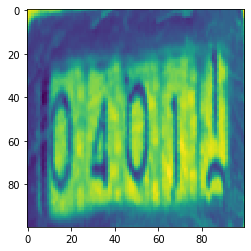

In [17]:
plt.imshow(train_dataset[1,:,:])
print(train_labels[1])

In [18]:
train_dataset = train_dataset[..., np.newaxis]

In [19]:
def prepare_final_data(x_train, y_train):
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2)
    print(x_train.shape[0], "train samples")
    print(x_valid.shape[0], "valid samples")
    return {
        "x_train": x_train,
        "y_train": y_train,
        "x_valid": x_valid,
        "y_valid": y_valid
    }

In [20]:
dataset = prepare_final_data(train_dataset, train_labels)

2334 train samples
584 valid samples


In [21]:
x_train, y_train, x_valid, y_valid = dataset["x_train"], dataset["y_train"], dataset["x_valid"], dataset["y_valid"]

In [22]:
print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape)

(2334, 100, 100, 1) (2334, 5) (584, 100, 100, 1) (584, 5)


In [23]:
y_train[0]

array([0, 3, 5, 8, 3])

In [24]:
batch_size = 32
img_height = 100
img_width = 100

In [25]:
x =tf.keras.layers.Input(shape=(100, 100, 1))
y= tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(x)
y=tf.keras.layers.Conv2D(64, (3,3), activation='relu')(y)
y=tf.keras.layers.MaxPooling2D(2, 2)(y)
    # The second convolution
y=tf.keras.layers.Conv2D(64, (3,3), activation='relu')(y)
y=tf.keras.layers.MaxPooling2D(2,2)(y)
    # The third convolution
y=tf.keras.layers.Conv2D(128, (3,3), activation='relu')(y)
y=tf.keras.layers.MaxPooling2D(2,2)(y)
    # The fourth convolution
y=tf.keras.layers.Conv2D(128, (3,3), activation='relu')(y)
y=tf.keras.layers.MaxPooling2D(2,2)(y)
    # Flatten the results to feed into a DNN
y=tf.keras.layers.Flatten()(y)
y=tf.keras.layers.Dropout(0.5)(y)
    # 512 neuron hidden layer
y=tf.keras.layers.Dense(512, activation='relu')(y)

out_num = 10
digit1 = tf.keras.layers.Dense(out_num, activation="softmax", name="digit1")(y)
digit2 = tf.keras.layers.Dense(out_num, activation="softmax", name="digit2")(y)
digit3 = tf.keras.layers.Dense(out_num, activation="softmax", name="digit3")(y)
digit4 = tf.keras.layers.Dense(out_num, activation="softmax", name="digit4")(y)
digit5 = tf.keras.layers.Dense(out_num, activation="softmax", name="digit5")(y)

model = tf.keras.Model(inputs=x, outputs=[digit1, digit2, digit3, digit4, digit5])

In [26]:
model.compile(
  optimizer='adam',
  loss=tf.losses.CategoricalCrossentropy(),
  metrics=['accuracy'])

In [27]:
    def convert_labels(classes, labels):
        digit1 = np.ndarray(shape=(len(labels), classes))
        digit2 = np.ndarray(shape=(len(labels), classes))
        digit3 = np.ndarray(shape=(len(labels), classes))
        digit4 = np.ndarray(shape=(len(labels), classes))
        digit5 = np.ndarray(shape=(len(labels), classes))
        
        for idx, label in enumerate(labels):
            digit1[idx,:] = to_categorical(label[0], classes)
            digit2[idx,:] = to_categorical(label[1], classes)
            digit3[idx,:] = to_categorical(label[2], classes)
            digit4[idx,:] = to_categorical(label[3], classes)
            digit5[idx,:] = to_categorical(label[4], classes)
            
        return [digit1, digit2, digit3, digit4, digit5]

In [28]:
from tensorflow.keras.utils import to_categorical
y_train = convert_labels(out_num, y_train)
y_valid = convert_labels(out_num, y_valid)

In [29]:
model.fit(
  x_train, y_train,
  batch_size=batch_size,
  validation_data=(x_valid, y_valid),
  epochs=200
)


Epoch 1/200
73/73 [==============================] - 23s 321ms/step - loss: 9.1667 - digit1_loss: 0.6874 - digit2_loss: 1.5199 - digit3_loss: 2.3097 - digit4_loss: 2.3260 - digit5_loss: 2.3237 - digit1_accuracy: 0.8956 - digit2_accuracy: 0.6151 - digit3_accuracy: 0.1278 - digit4_accuracy: 0.0795 - digit5_accuracy: 0.1014 - val_loss: 8.3874 - val_digit1_loss: 0.2483 - val_digit2_loss: 1.2443 - val_digit3_loss: 2.2919 - val_digit4_loss: 2.3125 - val_digit5_loss: 2.2904 - val_digit1_accuracy: 0.9555 - val_digit2_accuracy: 0.6747 - val_digit3_accuracy: 0.1250 - val_digit4_accuracy: 0.0908 - val_digit5_accuracy: 0.1490
Epoch 2/200
73/73 [==============================] - 21s 288ms/step - loss: 8.5260 - digit1_loss: 0.2684 - digit2_loss: 1.3458 - digit3_loss: 2.2939 - digit4_loss: 2.3091 - digit5_loss: 2.3089 - digit1_accuracy: 0.9486 - digit2_accuracy: 0.6282 - digit3_accuracy: 0.1087 - digit4_accuracy: 0.1065 - digit5_accuracy: 0.0985 - val_loss: 8.3966 - val_digit1_loss: 0.2520 - val_digi

73/73 [==============================] - 20s 279ms/step - loss: 7.7388 - digit1_loss: 0.1827 - digit2_loss: 1.1277 - digit3_loss: 2.0128 - digit4_loss: 2.1619 - digit5_loss: 2.2537 - digit1_accuracy: 0.9589 - digit2_accuracy: 0.6474 - digit3_accuracy: 0.2699 - digit4_accuracy: 0.2115 - digit5_accuracy: 0.1641 - val_loss: 7.6921 - val_digit1_loss: 0.1668 - val_digit2_loss: 1.0076 - val_digit3_loss: 2.0207 - val_digit4_loss: 2.1668 - val_digit5_loss: 2.3304 - val_digit1_accuracy: 0.9555 - val_digit2_accuracy: 0.6815 - val_digit3_accuracy: 0.2740 - val_digit4_accuracy: 0.2003 - val_digit5_accuracy: 0.1182
Epoch 15/200
73/73 [==============================] - 20s 273ms/step - loss: 7.5481 - digit1_loss: 0.2169 - digit2_loss: 1.1269 - digit3_loss: 1.8964 - digit4_loss: 2.0810 - digit5_loss: 2.2268 - digit1_accuracy: 0.9484 - digit2_accuracy: 0.6484 - digit3_accuracy: 0.3203 - digit4_accuracy: 0.2347 - digit5_accuracy: 0.1880 - val_loss: 7.5607 - val_digit1_loss: 0.1497 - val_digit2_loss: 0.

73/73 [==============================] - 21s 283ms/step - loss: 3.0237 - digit1_loss: 0.0632 - digit2_loss: 0.3509 - digit3_loss: 0.5947 - digit4_loss: 0.8090 - digit5_loss: 1.2059 - digit1_accuracy: 0.9787 - digit2_accuracy: 0.8911 - digit3_accuracy: 0.7946 - digit4_accuracy: 0.7160 - digit5_accuracy: 0.5680 - val_loss: 6.9091 - val_digit1_loss: 0.1973 - val_digit2_loss: 0.8773 - val_digit3_loss: 1.4374 - val_digit4_loss: 1.8709 - val_digit5_loss: 2.5262 - val_digit1_accuracy: 0.9521 - val_digit2_accuracy: 0.7603 - val_digit3_accuracy: 0.5103 - val_digit4_accuracy: 0.4007 - val_digit5_accuracy: 0.1849
Epoch 28/200
73/73 [==============================] - 20s 279ms/step - loss: 2.5746 - digit1_loss: 0.0503 - digit2_loss: 0.2859 - digit3_loss: 0.5008 - digit4_loss: 0.6679 - digit5_loss: 1.0697 - digit1_accuracy: 0.9853 - digit2_accuracy: 0.8958 - digit3_accuracy: 0.8162 - digit4_accuracy: 0.7750 - digit5_accuracy: 0.6332 - val_loss: 7.3395 - val_digit1_loss: 0.1750 - val_digit2_loss: 0.

73/73 [==============================] - 21s 282ms/step - loss: 1.0406 - digit1_loss: 0.0214 - digit2_loss: 0.1101 - digit3_loss: 0.2077 - digit4_loss: 0.2893 - digit5_loss: 0.4121 - digit1_accuracy: 0.9947 - digit2_accuracy: 0.9658 - digit3_accuracy: 0.9273 - digit4_accuracy: 0.9004 - digit5_accuracy: 0.8638 - val_loss: 9.0381 - val_digit1_loss: 0.2268 - val_digit2_loss: 1.1394 - val_digit3_loss: 1.8589 - val_digit4_loss: 2.4575 - val_digit5_loss: 3.3554 - val_digit1_accuracy: 0.9401 - val_digit2_accuracy: 0.7534 - val_digit3_accuracy: 0.5188 - val_digit4_accuracy: 0.4024 - val_digit5_accuracy: 0.2003
Epoch 41/200
73/73 [==============================] - 20s 274ms/step - loss: 1.0627 - digit1_loss: 0.0154 - digit2_loss: 0.1329 - digit3_loss: 0.2310 - digit4_loss: 0.3132 - digit5_loss: 0.3703 - digit1_accuracy: 0.9970 - digit2_accuracy: 0.9571 - digit3_accuracy: 0.9263 - digit4_accuracy: 0.8836 - digit5_accuracy: 0.8781 - val_loss: 8.7564 - val_digit1_loss: 0.2246 - val_digit2_loss: 1.

73/73 [==============================] - 20s 269ms/step - loss: 0.6394 - digit1_loss: 0.0193 - digit2_loss: 0.0801 - digit3_loss: 0.1393 - digit4_loss: 0.1618 - digit5_loss: 0.2389 - digit1_accuracy: 0.9926 - digit2_accuracy: 0.9702 - digit3_accuracy: 0.9521 - digit4_accuracy: 0.9481 - digit5_accuracy: 0.9168 - val_loss: 10.0959 - val_digit1_loss: 0.3087 - val_digit2_loss: 1.3049 - val_digit3_loss: 1.8914 - val_digit4_loss: 2.6489 - val_digit5_loss: 3.9419 - val_digit1_accuracy: 0.9503 - val_digit2_accuracy: 0.7517 - val_digit3_accuracy: 0.5582 - val_digit4_accuracy: 0.4075 - val_digit5_accuracy: 0.1729
Epoch 54/200
73/73 [==============================] - 20s 274ms/step - loss: 0.6069 - digit1_loss: 0.0107 - digit2_loss: 0.0715 - digit3_loss: 0.1607 - digit4_loss: 0.1542 - digit5_loss: 0.2098 - digit1_accuracy: 0.9955 - digit2_accuracy: 0.9762 - digit3_accuracy: 0.9466 - digit4_accuracy: 0.9521 - digit5_accuracy: 0.9284 - val_loss: 9.9730 - val_digit1_loss: 0.3018 - val_digit2_loss: 1

73/73 [==============================] - 21s 284ms/step - loss: 0.4457 - digit1_loss: 0.0142 - digit2_loss: 0.0451 - digit3_loss: 0.1033 - digit4_loss: 0.1354 - digit5_loss: 0.1476 - digit1_accuracy: 0.9966 - digit2_accuracy: 0.9849 - digit3_accuracy: 0.9690 - digit4_accuracy: 0.9605 - digit5_accuracy: 0.9548 - val_loss: 10.8633 - val_digit1_loss: 0.3070 - val_digit2_loss: 1.2853 - val_digit3_loss: 2.1675 - val_digit4_loss: 2.8652 - val_digit5_loss: 4.2384 - val_digit1_accuracy: 0.9606 - val_digit2_accuracy: 0.7603 - val_digit3_accuracy: 0.5257 - val_digit4_accuracy: 0.4127 - val_digit5_accuracy: 0.1815
Epoch 67/200
73/73 [==============================] - 21s 283ms/step - loss: 0.5035 - digit1_loss: 0.0114 - digit2_loss: 0.0515 - digit3_loss: 0.0909 - digit4_loss: 0.1425 - digit5_loss: 0.2072 - digit1_accuracy: 0.9959 - digit2_accuracy: 0.9802 - digit3_accuracy: 0.9675 - digit4_accuracy: 0.9537 - digit5_accuracy: 0.9344 - val_loss: 10.4721 - val_digit1_loss: 0.2743 - val_digit2_loss: 

73/73 [==============================] - 21s 282ms/step - loss: 0.3970 - digit1_loss: 0.0050 - digit2_loss: 0.0536 - digit3_loss: 0.0977 - digit4_loss: 0.0878 - digit5_loss: 0.1529 - digit1_accuracy: 0.9981 - digit2_accuracy: 0.9827 - digit3_accuracy: 0.9696 - digit4_accuracy: 0.9693 - digit5_accuracy: 0.9486 - val_loss: 11.1500 - val_digit1_loss: 0.3222 - val_digit2_loss: 1.3668 - val_digit3_loss: 2.1922 - val_digit4_loss: 2.9338 - val_digit5_loss: 4.3350 - val_digit1_accuracy: 0.9555 - val_digit2_accuracy: 0.7637 - val_digit3_accuracy: 0.5377 - val_digit4_accuracy: 0.4024 - val_digit5_accuracy: 0.1729
Epoch 80/200
73/73 [==============================] - 20s 280ms/step - loss: 0.3876 - digit1_loss: 0.0096 - digit2_loss: 0.0540 - digit3_loss: 0.0792 - digit4_loss: 0.0844 - digit5_loss: 0.1604 - digit1_accuracy: 0.9973 - digit2_accuracy: 0.9806 - digit3_accuracy: 0.9696 - digit4_accuracy: 0.9711 - digit5_accuracy: 0.9484 - val_loss: 11.0453 - val_digit1_loss: 0.3301 - val_digit2_loss: 

73/73 [==============================] - 20s 270ms/step - loss: 0.3710 - digit1_loss: 0.0048 - digit2_loss: 0.0491 - digit3_loss: 0.1001 - digit4_loss: 0.1116 - digit5_loss: 0.1053 - digit1_accuracy: 0.9986 - digit2_accuracy: 0.9846 - digit3_accuracy: 0.9674 - digit4_accuracy: 0.9706 - digit5_accuracy: 0.9644 - val_loss: 11.0893 - val_digit1_loss: 0.2669 - val_digit2_loss: 1.4568 - val_digit3_loss: 2.1301 - val_digit4_loss: 2.8317 - val_digit5_loss: 4.4037 - val_digit1_accuracy: 0.9589 - val_digit2_accuracy: 0.7466 - val_digit3_accuracy: 0.5514 - val_digit4_accuracy: 0.4247 - val_digit5_accuracy: 0.1729
Epoch 93/200
73/73 [==============================] - 21s 288ms/step - loss: 0.2850 - digit1_loss: 0.0065 - digit2_loss: 0.0406 - digit3_loss: 0.0486 - digit4_loss: 0.0792 - digit5_loss: 0.1101 - digit1_accuracy: 0.9978 - digit2_accuracy: 0.9878 - digit3_accuracy: 0.9872 - digit4_accuracy: 0.9694 - digit5_accuracy: 0.9666 - val_loss: 11.3001 - val_digit1_loss: 0.2568 - val_digit2_loss: 

73/73 [==============================] - 31s 431ms/step - loss: 0.2968 - digit1_loss: 0.0105 - digit2_loss: 0.0211 - digit3_loss: 0.0721 - digit4_loss: 0.0727 - digit5_loss: 0.1204 - digit1_accuracy: 0.9968 - digit2_accuracy: 0.9914 - digit3_accuracy: 0.9771 - digit4_accuracy: 0.9762 - digit5_accuracy: 0.9620 - val_loss: 11.3397 - val_digit1_loss: 0.2877 - val_digit2_loss: 1.4780 - val_digit3_loss: 2.1760 - val_digit4_loss: 2.9741 - val_digit5_loss: 4.4240 - val_digit1_accuracy: 0.9503 - val_digit2_accuracy: 0.7500 - val_digit3_accuracy: 0.5428 - val_digit4_accuracy: 0.4161 - val_digit5_accuracy: 0.2038
Epoch 106/200
73/73 [==============================] - 24s 331ms/step - loss: 0.3210 - digit1_loss: 0.0059 - digit2_loss: 0.0344 - digit3_loss: 0.0758 - digit4_loss: 0.0851 - digit5_loss: 0.1199 - digit1_accuracy: 0.9987 - digit2_accuracy: 0.9888 - digit3_accuracy: 0.9700 - digit4_accuracy: 0.9745 - digit5_accuracy: 0.9565 - val_loss: 11.2361 - val_digit1_loss: 0.3047 - val_digit2_loss:

73/73 [==============================] - 31s 429ms/step - loss: 0.2888 - digit1_loss: 0.0064 - digit2_loss: 0.0435 - digit3_loss: 0.0619 - digit4_loss: 0.0855 - digit5_loss: 0.0916 - digit1_accuracy: 0.9994 - digit2_accuracy: 0.9846 - digit3_accuracy: 0.9788 - digit4_accuracy: 0.9723 - digit5_accuracy: 0.9700 - val_loss: 11.2468 - val_digit1_loss: 0.3550 - val_digit2_loss: 1.4203 - val_digit3_loss: 2.1010 - val_digit4_loss: 2.9927 - val_digit5_loss: 4.3777 - val_digit1_accuracy: 0.9418 - val_digit2_accuracy: 0.7414 - val_digit3_accuracy: 0.5188 - val_digit4_accuracy: 0.3973 - val_digit5_accuracy: 0.1884
Epoch 119/200
73/73 [==============================] - 26s 353ms/step - loss: 0.2649 - digit1_loss: 0.0043 - digit2_loss: 0.0241 - digit3_loss: 0.0352 - digit4_loss: 0.0900 - digit5_loss: 0.1112 - digit1_accuracy: 0.9994 - digit2_accuracy: 0.9907 - digit3_accuracy: 0.9890 - digit4_accuracy: 0.9691 - digit5_accuracy: 0.9614 - val_loss: 11.6950 - val_digit1_loss: 0.3777 - val_digit2_loss:

73/73 [==============================] - 26s 351ms/step - loss: 0.2369 - digit1_loss: 0.0027 - digit2_loss: 0.0245 - digit3_loss: 0.0620 - digit4_loss: 0.0562 - digit5_loss: 0.0915 - digit1_accuracy: 0.9983 - digit2_accuracy: 0.9916 - digit3_accuracy: 0.9771 - digit4_accuracy: 0.9802 - digit5_accuracy: 0.9713 - val_loss: 11.8707 - val_digit1_loss: 0.3649 - val_digit2_loss: 1.5117 - val_digit3_loss: 2.2141 - val_digit4_loss: 2.9922 - val_digit5_loss: 4.7878 - val_digit1_accuracy: 0.9555 - val_digit2_accuracy: 0.7551 - val_digit3_accuracy: 0.5342 - val_digit4_accuracy: 0.4332 - val_digit5_accuracy: 0.1849
Epoch 132/200
73/73 [==============================] - 26s 351ms/step - loss: 0.3018 - digit1_loss: 0.0077 - digit2_loss: 0.0288 - digit3_loss: 0.0693 - digit4_loss: 0.0871 - digit5_loss: 0.1089 - digit1_accuracy: 0.9975 - digit2_accuracy: 0.9911 - digit3_accuracy: 0.9783 - digit4_accuracy: 0.9721 - digit5_accuracy: 0.9628 - val_loss: 11.1384 - val_digit1_loss: 0.2819 - val_digit2_loss:

73/73 [==============================] - 24s 330ms/step - loss: 0.2661 - digit1_loss: 0.0044 - digit2_loss: 0.0351 - digit3_loss: 0.0667 - digit4_loss: 0.0677 - digit5_loss: 0.0922 - digit1_accuracy: 0.9985 - digit2_accuracy: 0.9877 - digit3_accuracy: 0.9723 - digit4_accuracy: 0.9741 - digit5_accuracy: 0.9698 - val_loss: 11.3032 - val_digit1_loss: 0.3105 - val_digit2_loss: 1.2773 - val_digit3_loss: 2.1709 - val_digit4_loss: 2.9592 - val_digit5_loss: 4.5853 - val_digit1_accuracy: 0.9555 - val_digit2_accuracy: 0.7637 - val_digit3_accuracy: 0.5291 - val_digit4_accuracy: 0.4144 - val_digit5_accuracy: 0.1558
Epoch 145/200
73/73 [==============================] - 24s 333ms/step - loss: 0.2879 - digit1_loss: 0.0049 - digit2_loss: 0.0350 - digit3_loss: 0.0458 - digit4_loss: 0.1174 - digit5_loss: 0.0847 - digit1_accuracy: 0.9985 - digit2_accuracy: 0.9901 - digit3_accuracy: 0.9871 - digit4_accuracy: 0.9636 - digit5_accuracy: 0.9718 - val_loss: 11.6203 - val_digit1_loss: 0.3294 - val_digit2_loss:

73/73 [==============================] - 25s 336ms/step - loss: 0.2271 - digit1_loss: 0.0050 - digit2_loss: 0.0238 - digit3_loss: 0.0583 - digit4_loss: 0.0640 - digit5_loss: 0.0760 - digit1_accuracy: 0.9991 - digit2_accuracy: 0.9924 - digit3_accuracy: 0.9802 - digit4_accuracy: 0.9728 - digit5_accuracy: 0.9791 - val_loss: 11.0708 - val_digit1_loss: 0.3494 - val_digit2_loss: 1.3665 - val_digit3_loss: 2.0555 - val_digit4_loss: 2.8382 - val_digit5_loss: 4.4612 - val_digit1_accuracy: 0.9435 - val_digit2_accuracy: 0.7620 - val_digit3_accuracy: 0.5479 - val_digit4_accuracy: 0.4247 - val_digit5_accuracy: 0.1935
Epoch 158/200
73/73 [==============================] - 25s 338ms/step - loss: 0.2074 - digit1_loss: 0.0015 - digit2_loss: 0.0229 - digit3_loss: 0.0630 - digit4_loss: 0.0510 - digit5_loss: 0.0689 - digit1_accuracy: 0.9999 - digit2_accuracy: 0.9951 - digit3_accuracy: 0.9784 - digit4_accuracy: 0.9823 - digit5_accuracy: 0.9784 - val_loss: 11.4183 - val_digit1_loss: 0.3415 - val_digit2_loss:

73/73 [==============================] - 24s 335ms/step - loss: 0.2404 - digit1_loss: 0.0024 - digit2_loss: 0.0260 - digit3_loss: 0.0523 - digit4_loss: 0.0653 - digit5_loss: 0.0943 - digit1_accuracy: 0.9992 - digit2_accuracy: 0.9927 - digit3_accuracy: 0.9815 - digit4_accuracy: 0.9788 - digit5_accuracy: 0.9668 - val_loss: 11.6998 - val_digit1_loss: 0.3012 - val_digit2_loss: 1.4089 - val_digit3_loss: 2.1658 - val_digit4_loss: 3.1035 - val_digit5_loss: 4.7204 - val_digit1_accuracy: 0.9538 - val_digit2_accuracy: 0.7568 - val_digit3_accuracy: 0.5479 - val_digit4_accuracy: 0.4281 - val_digit5_accuracy: 0.1832
Epoch 171/200
73/73 [==============================] - 25s 340ms/step - loss: 0.2539 - digit1_loss: 0.0036 - digit2_loss: 0.0248 - digit3_loss: 0.0634 - digit4_loss: 0.0789 - digit5_loss: 0.0832 - digit1_accuracy: 0.9981 - digit2_accuracy: 0.9931 - digit3_accuracy: 0.9792 - digit4_accuracy: 0.9713 - digit5_accuracy: 0.9709 - val_loss: 11.5719 - val_digit1_loss: 0.3382 - val_digit2_loss:

73/73 [==============================] - 24s 330ms/step - loss: 0.1914 - digit1_loss: 0.0034 - digit2_loss: 0.0269 - digit3_loss: 0.0460 - digit4_loss: 0.0447 - digit5_loss: 0.0704 - digit1_accuracy: 0.9993 - digit2_accuracy: 0.9932 - digit3_accuracy: 0.9827 - digit4_accuracy: 0.9861 - digit5_accuracy: 0.9768 - val_loss: 12.0855 - val_digit1_loss: 0.3761 - val_digit2_loss: 1.4025 - val_digit3_loss: 2.2196 - val_digit4_loss: 3.1645 - val_digit5_loss: 4.9227 - val_digit1_accuracy: 0.9606 - val_digit2_accuracy: 0.7791 - val_digit3_accuracy: 0.5274 - val_digit4_accuracy: 0.4212 - val_digit5_accuracy: 0.1695
Epoch 184/200
73/73 [==============================] - 25s 341ms/step - loss: 0.1973 - digit1_loss: 0.0098 - digit2_loss: 0.0161 - digit3_loss: 0.0493 - digit4_loss: 0.0591 - digit5_loss: 0.0629 - digit1_accuracy: 0.9966 - digit2_accuracy: 0.9941 - digit3_accuracy: 0.9835 - digit4_accuracy: 0.9842 - digit5_accuracy: 0.9777 - val_loss: 11.6494 - val_digit1_loss: 0.3540 - val_digit2_loss:

73/73 [==============================] - 25s 343ms/step - loss: 0.2159 - digit1_loss: 0.0024 - digit2_loss: 0.0175 - digit3_loss: 0.0528 - digit4_loss: 0.0747 - digit5_loss: 0.0684 - digit1_accuracy: 0.9980 - digit2_accuracy: 0.9932 - digit3_accuracy: 0.9834 - digit4_accuracy: 0.9792 - digit5_accuracy: 0.9769 - val_loss: 11.2846 - val_digit1_loss: 0.3417 - val_digit2_loss: 1.3457 - val_digit3_loss: 2.0328 - val_digit4_loss: 2.9989 - val_digit5_loss: 4.5656 - val_digit1_accuracy: 0.9503 - val_digit2_accuracy: 0.7568 - val_digit3_accuracy: 0.5514 - val_digit4_accuracy: 0.4058 - val_digit5_accuracy: 0.1798
Epoch 197/200
73/73 [==============================] - 25s 337ms/step - loss: 0.1659 - digit1_loss: 0.0034 - digit2_loss: 0.0164 - digit3_loss: 0.0386 - digit4_loss: 0.0554 - digit5_loss: 0.0520 - digit1_accuracy: 0.9982 - digit2_accuracy: 0.9954 - digit3_accuracy: 0.9878 - digit4_accuracy: 0.9816 - digit5_accuracy: 0.9845 - val_loss: 11.8563 - val_digit1_loss: 0.3613 - val_digit2_loss:

In [208]:
model.save("model_multi_crop.h5")